# Lab 2: Data Preparation

**Student ID:** 17210577 <br>
**Student Name:** Lena Stolz

## I. Importing Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading in the .csv file
dataFrame = pd.read_csv('./bank.csv')

In [3]:
# Check for missing values
dataFrame.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [4]:
# Create copy of dataframe
dataFrame_original = dataFrame

## II. Process and Encode the Categorical Features

### Encode Ordinal Categorical Attributes

In [5]:
education_mapper = {"primary": 1, "secondary": 2, "tertiary": 3}
dataFrame['education'] = dataFrame['education'].replace(education_mapper)

dataFrame.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [6]:
month_mapper = {
    "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
    "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}
dataFrame['month'] = dataFrame['month'].replace(month_mapper)

dataFrame.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,9,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,2.0,no,127,no,no,cellular,16,9,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,1.0,no,1154,no,no,telephone,17,9,231,1,-1,0,NaN,yes
1998,46.0,services,married,1.0,no,4343,yes,no,NaN,20,9,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,2.0,no,6403,no,no,cellular,22,9,208,2,-1,0,NaN,yes


### One-Hot Encode All Other Categorical Attributes

In [7]:
# One-hot encoding of columns with NaNs
dataFrame = pd.get_dummies(dataFrame, columns = ['job', 'contact', 'poutcome'],
                                      dummy_na = True,
                                      drop_first = True)
dataFrame.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
0,32.0,single,3.0,no,392,yes,no,1,4,957,2,131,2,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,39.0,divorced,2.0,no,688,yes,yes,1,4,233,2,133,1,no,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,59.0,married,2.0,no,1035,yes,yes,1,4,126,2,239,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,47.0,married,2.0,no,398,yes,yes,1,4,274,1,238,2,no,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.0,married,2.0,no,1004,yes,no,1,4,479,1,307,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# One-hot encoding the remaining categoru=ical columns
dataFrame = pd.get_dummies(dataFrame, drop_first = True)
dataFrame.head()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
0,32.0,3.0,392,1,4,957,2,131,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
1,39.0,2.0,688,1,4,233,2,133,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
2,59.0,2.0,1035,1,4,126,2,239,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
3,47.0,2.0,398,1,4,274,1,238,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,54.0,2.0,1004,1,4,479,1,307,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


In [9]:
dataFrame.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

## III. Missing Values

In [10]:
# Here we replace the NaNs in education column with '0' 
dataFrame['education'].fillna(0, inplace = True)
dataFrame.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,0.0,2785,16,9,327,2,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1996,28.0,2.0,127,16,9,1334,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1997,81.0,1.0,1154,17,9,231,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1998,46.0,1.0,4343,20,9,185,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
1999,40.0,2.0,6403,22,9,208,2,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


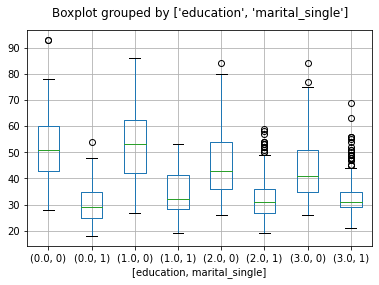

In [11]:
# Now we print a boxplot for age by education
dataFrame.boxplot(column = 'age', by = ['education', 'marital_single'])
plt.title("")
plt.show()

In [12]:
# Next we create a pivot table

pivotTable = dataFrame.pivot_table( values = 'age',
                                    index = 'education',
                                    columns = 'marital_single',
                                    aggfunc = np.median)

pivotTable

marital_single,0,1
education,,
0.0,51.0,29.0
1.0,53.0,32.0
2.0,43.0,31.0
3.0,41.0,31.0


In [13]:
# In this step we define the function to return an element of the pivot table 
def get_element(x):
   return pivotTable.loc[x['education'], x['marital_single']]

# Here we are replacing the missing values
dataFrame['age'].fillna(dataFrame[dataFrame['age'].isnull()].apply(get_element, axis = 1),
                        inplace = True)

In [14]:
dataFrame.isna().sum()

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
dtype: int64

## IV. Rescaling Features

In [17]:
# Here we are going to use the RobustScaler after importing it
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
dataFrame[['age', 'balance', 'pdays', 'previous']] = robust_scaler.fit_transform(dataFrame[['age', 'balance', 'pdays', 'previous']])

In [18]:
dataFrame.describe()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.207583,2.129500,0.597826,13.851500,5.002500,292.020500,1.909500,-0.080479,0.280750,0.149000,0.02250,0.017500,0.230500,0.081000,0.032000,0.082500,0.04800,0.174000,0.034500,0.005000,0.073000,0.095500,0.073500,0.222000,0.227000,0.555500,0.337000,0.007500,0.481500,0.125000,0.500000
std,0.705435,0.801281,2.169941,9.712189,3.079974,221.557295,1.378862,0.751807,1.700368,0.356178,0.14834,0.131158,0.421258,0.272903,0.176044,0.275194,0.21382,0.379204,0.182555,0.070551,0.260202,0.293978,0.261021,0.415695,0.418997,0.497034,0.472803,0.086299,0.499783,0.330802,0.500125
min,-1.111111,0.000000,-1.060984,1.000000,1.000000,7.000000,1.000000,-1.044223,-1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.333333,2.000000,-0.242204,5.000000,2.000000,146.000000,1.000000,-0.606277,-0.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,12.000000,5.000000,236.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.666667,3.000000,0.757796,23.000000,7.000000,379.000000,2.000000,0.393723,0.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,3.055556,3.000000,55.892585,31.000000,12.000000,1823.000000,11.000000,3.834522,26.500000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## V. Treatment of Outliers

In this section we see the log transformation on `age` and `subscribed` which was a focused in my first lab exercise. Below are the plotted histograms of before and after dealing with outliers.

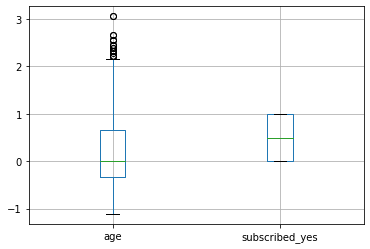

In [22]:
dataFrame.boxplot(column = ['age', 'subscribed_yes'])
plt.show()

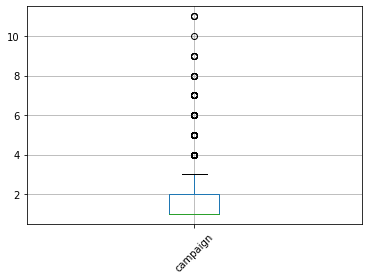

In [23]:
dataFrame.boxplot(column = ['campaign'], rot = 45)
plt.title("")
plt.show()

In [24]:
dataFrame['campaign'].value_counts()

1     1063
2      506
3      219
4       99
5       50
6       31
7       17
8        6
9        5
11       3
10       1
Name: campaign, dtype: int64

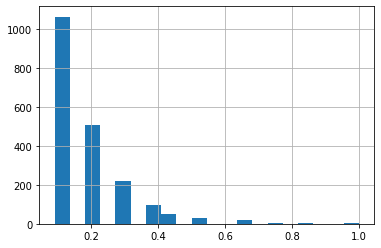

In [25]:
dataFrame['campaign'] = dataFrame['campaign']/11
dataFrame['campaign'].hist(bins = 20)
plt.show()

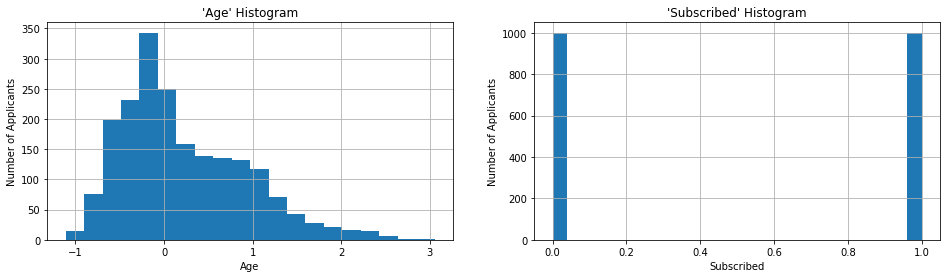

In [28]:
# Here we create two subplots
fig = plt.figure(figsize = (16,4))

# Histogram for 'Age'
axAge = fig.add_subplot(1, 2, 1)
axAge.set_title("'Age' Histogram")
axAge.set_xlabel('Age')
axAge.set_ylabel('Number of Applicants')
dataFrame['age'].hist(bins = 20)

# Histogram for 'Subscribed'
axSub = fig.add_subplot(1, 2, 2)
axSub.set_title("'Subscribed' Histogram")
axSub.set_xlabel('Subscribed')
axSub.set_ylabel('Number of Applicants')
dataFrame['subscribed_yes'].hist(bins = 25)

In [29]:
dataFrame[['subscribed_yes', 'age']].min()

subscribed_yes    0.000000
age              -1.111111
dtype: float64

In [30]:
dataFrame[['subscribed_yes', 'age']].max()

subscribed_yes    1.000000
age               3.055556
dtype: float64

In [31]:
# Here we us a log transformation in order to decrease the impact of outliers
dataFrame['subscribed_yes'] = np.log(dataFrame['subscribed_yes'] + 2.75)
dataFrame['age'] = np.log(dataFrame['age'] + 2.26)

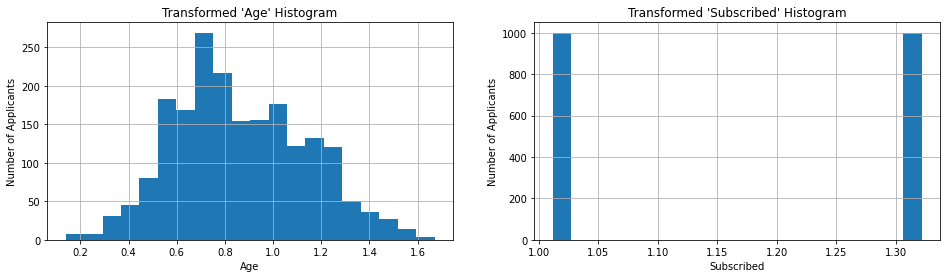

In [32]:
fig = plt.figure(figsize = (16,4))

# Plot for 'Age'
axAgeTrans = fig.add_subplot(1, 2, 1)
axAgeTrans.set_title("Transformed 'Age' Histogram")
axAgeTrans.set_xlabel('Age')
axAgeTrans.set_ylabel('Number of Applicants')
dataFrame['age'].hist(bins = 20)

# Plot for 'Subscribed'
axSubTrans = fig.add_subplot(1, 2, 2)
axSubTrans.set_title("Transformed 'Subscribed' Histogram")
axSubTrans.set_xlabel('Subscribed')
axSubTrans.set_ylabel('Number of Applicants')
dataFrame['subscribed_yes'].hist(bins = 20)

plt.show()

## VI. Creation of Derived Features

In [33]:
dataFrame['Sin_Month'] = np.sin(2 * np.pi * dataFrame['month'] / max(dataFrame['month']))
dataFrame['Cos_Month'] = np.cos(2 * np.pi * dataFrame['month'] / max(dataFrame['month']))

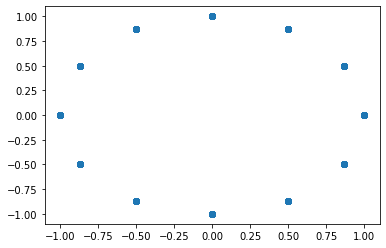

In [34]:
plt.scatter(x = dataFrame['Sin_Month'], y = dataFrame['Cos_Month'])

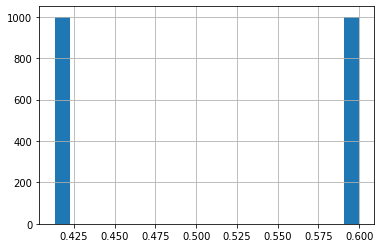

In [35]:
np.log(dataFrame['subscribed_yes'] + .5).hist(bins = 20)
plt.show()

In [39]:
dataFrame['AgeBalance'] = dataFrame_original['age'] + dataFrame_original['balance']
dataFrame[['AgeBalance']] = robust_scaler.fit_transform(dataFrame[['AgeBalance']])
dataFrame[['AgeBalance']].min()


AgeBalance   -1.059027
dtype: float64

In [40]:
dataFrame['AgeBalance'] = np.log(dataFrame['AgeBalance'] + 2.05)

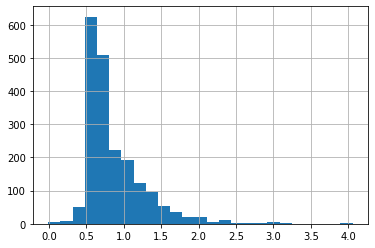

In [41]:
dataFrame['AgeBalance'].hist(bins = 25)

In [42]:
dataFrame['DayMonth'] = dataFrame['day'] + dataFrame['month']
dataFrame['DayMonth'] = robust_scaler.fit_transform(dataFrame[['DayMonth']])
dataFrame['DayMonth'].min()

-0.7368421052631579

In [43]:
dataFrame['DayMonth'] = np.log(dataFrame['DayMonth'] + 3.5)

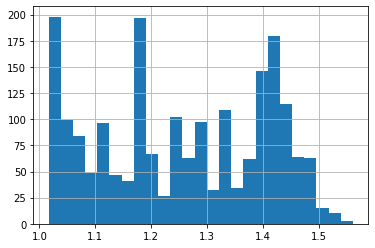

In [44]:
dataFrame['DayMonth'].hist(bins = 25)
plt.show()

In [45]:
dataFrame.drop('day', axis = 1, inplace = True)
dataFrame.drop('balance', axis = 1, inplace = True)
dataFrame.head(40)

,age,education,month,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes,Sin_Month,Cos_Month,AgeSubscribed,AgeBalance,DayMonth
0,0.655791,3.0,4,957,0.181818,-0.291013,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1.011601,0.866025,-0.5,-0.113900,0.660676,1.035243
1,0.839650,2.0,4,233,0.181818,-0.279601,-0.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1.011601,0.866025,-0.5,0.095898,0.763558,1.035243
2,1.231588,2.0,4,126,0.181818,0.325250,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1.011601,0.866025,-0.5,0.350009,0.875472,1.035243
3,1.015231,2.0,4,274,0.090909,0.319544,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1.011601,0.866025,-0.5,-0.099360,0.668158,1.035243
4,1.147050,2.0,4,479,0.090909,0.713267,-0.5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1.011601,0.866025,-0.5,0.325082,0.865032,1.035243
5,0.994897,3.0,4,463,0.090909,-0.279601,0.5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.011601,0.866025,-0.5,0.265536,0.839641,1.035243
6,0.711860,2.0,4,161,0.181818,0.405136,-0.5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1.011601,0.866025,-0.5,0.948243,1.098026,1.035243
7,0.974140,2.0,4,251,0.363636,0.838802,1.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1.011601,0.866025,-0.5,-0.102129,0.666737,1.035243
8,1.215242,3.0,4,121,0.181818,-0.268188,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.011601,0.866025,-0.5,-0.149212,0.642268,1.035243
9,1.054699,3.0,4,285,0.272727,-0.285307,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.011601,0.866025,-0.5,13.977843,2.774327,1.035243


In [46]:
dataFrame[['DayMonth', 'AgeBalance']].max()

DayMonth      1.560911
AgeBalance    4.059173
dtype: float64

In [47]:
dataFrame_original.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32.0,technician,single,3.0,no,392,yes,no,cellular,1,4,957,2,131,2,failure,no
1,39.0,technician,divorced,2.0,no,688,yes,yes,cellular,1,4,233,2,133,1,failure,no
2,59.0,retired,married,2.0,no,1035,yes,yes,cellular,1,4,126,2,239,1,failure,no
3,47.0,blue-collar,married,2.0,no,398,yes,yes,cellular,1,4,274,1,238,2,failure,no
4,54.0,retired,married,2.0,no,1004,yes,no,cellular,1,4,479,1,307,1,failure,no


## VII. Save the prepared Dataset

In [48]:
dataFrame.to_csv('bank_prepared.csv')